In [1]:
#Clustering car sales data

### Task1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("DS2_C6_S2_CarSales_Data_Challenge.csv")

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
df.shape

(157, 16)

In [6]:
df.drop(["__year_resale_value","Latest_Launch"],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.3+ KB


In [8]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [9]:
#there are null values. 

In [10]:
#missing value treatment
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [11]:
df1=df.copy()
car_sales=df.copy()

In [12]:
c= df.select_dtypes(include="object").columns.to_list()
for i in c:
    df[i]=df[i].astype("category")
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

In [13]:
#Scaling using Standard scaler

In [14]:
scaler=StandardScaler()

In [15]:
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
dfb=df.copy()

### Task2

In [16]:
#Elbow(Within Cluster Sum of Squares (WCSS)) and Silehouette values to find the best number of clusters(k) for k means algorithm

In [17]:
#finding optimal k and silhoutte
wcss=[]
silhouette={}
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=1)
    model.fit(df)
    wcss.append(model.inertia_)
    labels=model.labels_
    silhouette[i]=(silhouette_score(df,labels))

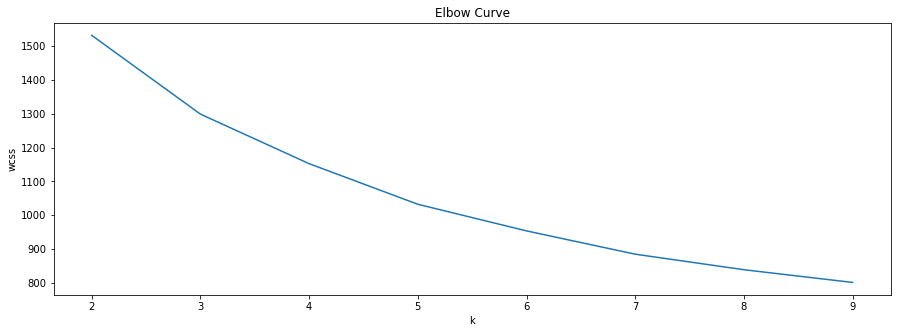

In [18]:
#plotting elbow curve:k vs wcss
plt.figure(figsize=(15, 5))
plt.plot(range(2,10),wcss)
plt.xlabel("k")
plt.ylabel("wcss")
plt.title("Elbow Curve")
plt.show()

In [19]:
#silhoutte scores for repsective k
silhouette

{2: 0.25071678490424726,
 3: 0.24325470113108508,
 4: 0.19954041128091224,
 5: 0.21279971305671735,
 6: 0.1773908395361446,
 7: 0.18952062623696242,
 8: 0.17378035232952338,
 9: 0.16115373845934639}

In [20]:
#considering k=5 for building model which seems optimal from both the metrics

### Task3

In [21]:
#building model
model=KMeans(n_clusters=5).fit(df)

In [22]:
#labels as clustered by model
labels=model.labels_
labels

array([1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 0, 1, 2, 2,
       2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 4, 0, 0, 0, 3,
       0, 3, 1, 2, 1, 2, 1, 2, 3, 3, 0, 3, 0, 1, 1, 1, 3, 3, 1, 1, 1, 2,
       2, 1, 3, 3, 2, 2, 4, 4, 0, 3, 4, 4, 0, 1, 1, 1, 2, 2, 3, 3, 1, 1,
       2, 2, 3, 3, 1, 2, 4, 4, 1, 1, 2, 4, 3, 1, 1, 2, 3, 3, 3, 3, 1, 2,
       1, 2, 3, 3, 1, 1, 3, 4, 1, 1, 2, 2, 2, 3, 1, 4, 4, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2])

In [23]:
df1["cluster"]=labels
df1.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,cluster
0,Acura,Integra,16.919,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,Acura,TL,39.384,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2
2,Acura,CL,14.114,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,2
3,Acura,RL,8.588,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2
4,Audi,A4,20.397,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1


In [24]:
df=df.values

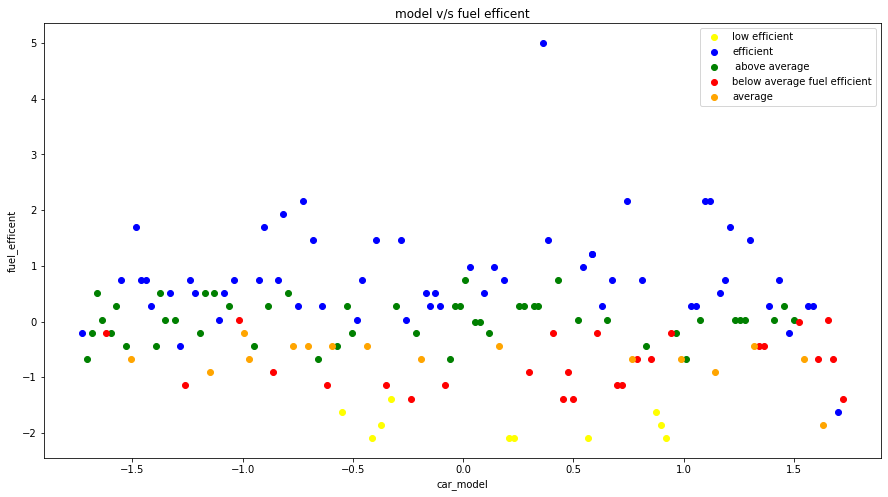

In [33]:
plt.figure(figsize = (15, 8))
plt.scatter(df[labels==0, 1], df[labels==0, -2], c='yellow', label = 'low efficient')
plt.scatter(df[labels==1, 1], df[labels==1, -2], c='blue', label = 'efficient')
plt.scatter(df[labels==2, 1], df[labels==2, -2], c='green', label = ' above average')
plt.scatter(df[labels==3, 1], df[labels==3, -2], c='red', label = 'below average fuel efficient')
plt.scatter(df[labels==4, 1], df[labels==4, -2], c='orange', label = 'average')
plt.title('model v/s fuel efficent')
plt.xlabel('car_model')
plt.ylabel('fuel_efficent')
plt.legend()
plt.show()

In [26]:
#Here we can see that cluster with label 3 are the ones with low fuel efficiency and label 1 is with high fuel efficiency

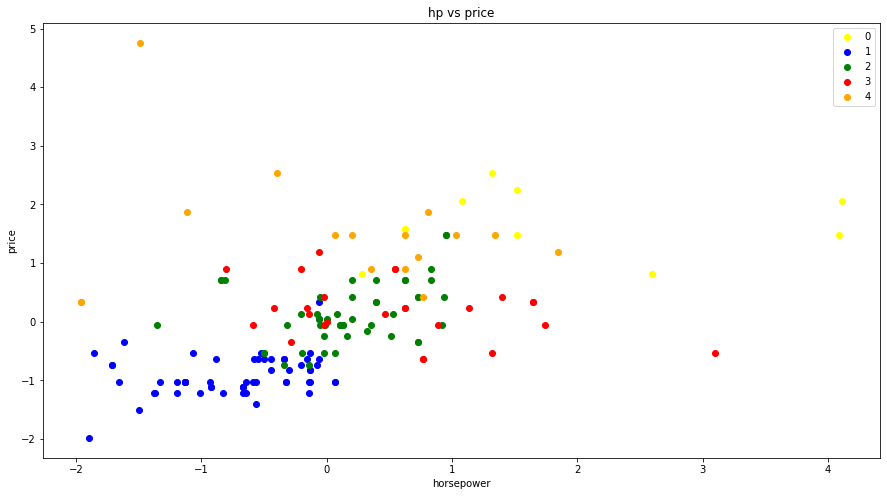

In [27]:
plt.figure(figsize = (15, 8))
plt.scatter(df[labels==0, 7], df[labels==0, 5], c='yellow', label = '0')
plt.scatter(df[labels==1, 7], df[labels==1, 5], c='blue', label = '1')
plt.scatter(df[labels==2, 7], df[labels==2, 5], c='green', label = '2')
plt.scatter(df[labels==3, 7], df[labels==3, 5], c='red', label = '3')
plt.scatter(df[labels==4, 7], df[labels==4, 5], c='orange', label = '4')
plt.title('hp vs price')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
#here we can see how cars are clustered based on price and hp
#low hp and price are in blue coloured- cluster 1

In [28]:
#manufacturer wise count wrt clusters
pd.crosstab(index=df1["Manufacturer"],columns=df1["cluster"])

cluster,0,1,2,3,4
Manufacturer,,,,,
Acura,0,1,3,0,0
Audi,0,1,1,0,1
BMW,0,0,3,0,0
Buick,0,0,4,0,0
Cadillac,1,0,1,0,3
Chevrolet,0,3,5,0,1
Chrysler,0,1,5,1,0
Dodge,4,1,3,2,1
Ford,2,3,3,3,0


In [29]:
df1.pivot_table(index="cluster",values=["Price_in_thousands","Horsepower","Power_perf_factor","Engine_size"])

,Engine_size,Horsepower,Power_perf_factor,Price_in_thousands
cluster,,,,
0,4.790000,228.500000,95.547678,34.944800
1,2.119298,138.298246,56.609478,18.513754
2,3.204167,200.562500,82.230872,27.862932
3,3.252342,179.113412,73.798280,24.893106
4,4.593750,296.375000,127.986853,56.935938


In [30]:
#We can see for all features like engine size,horsepower,power,price cluster 4 was mapped with higher  mean values from data
#and low mean values of these features were put into cluster1

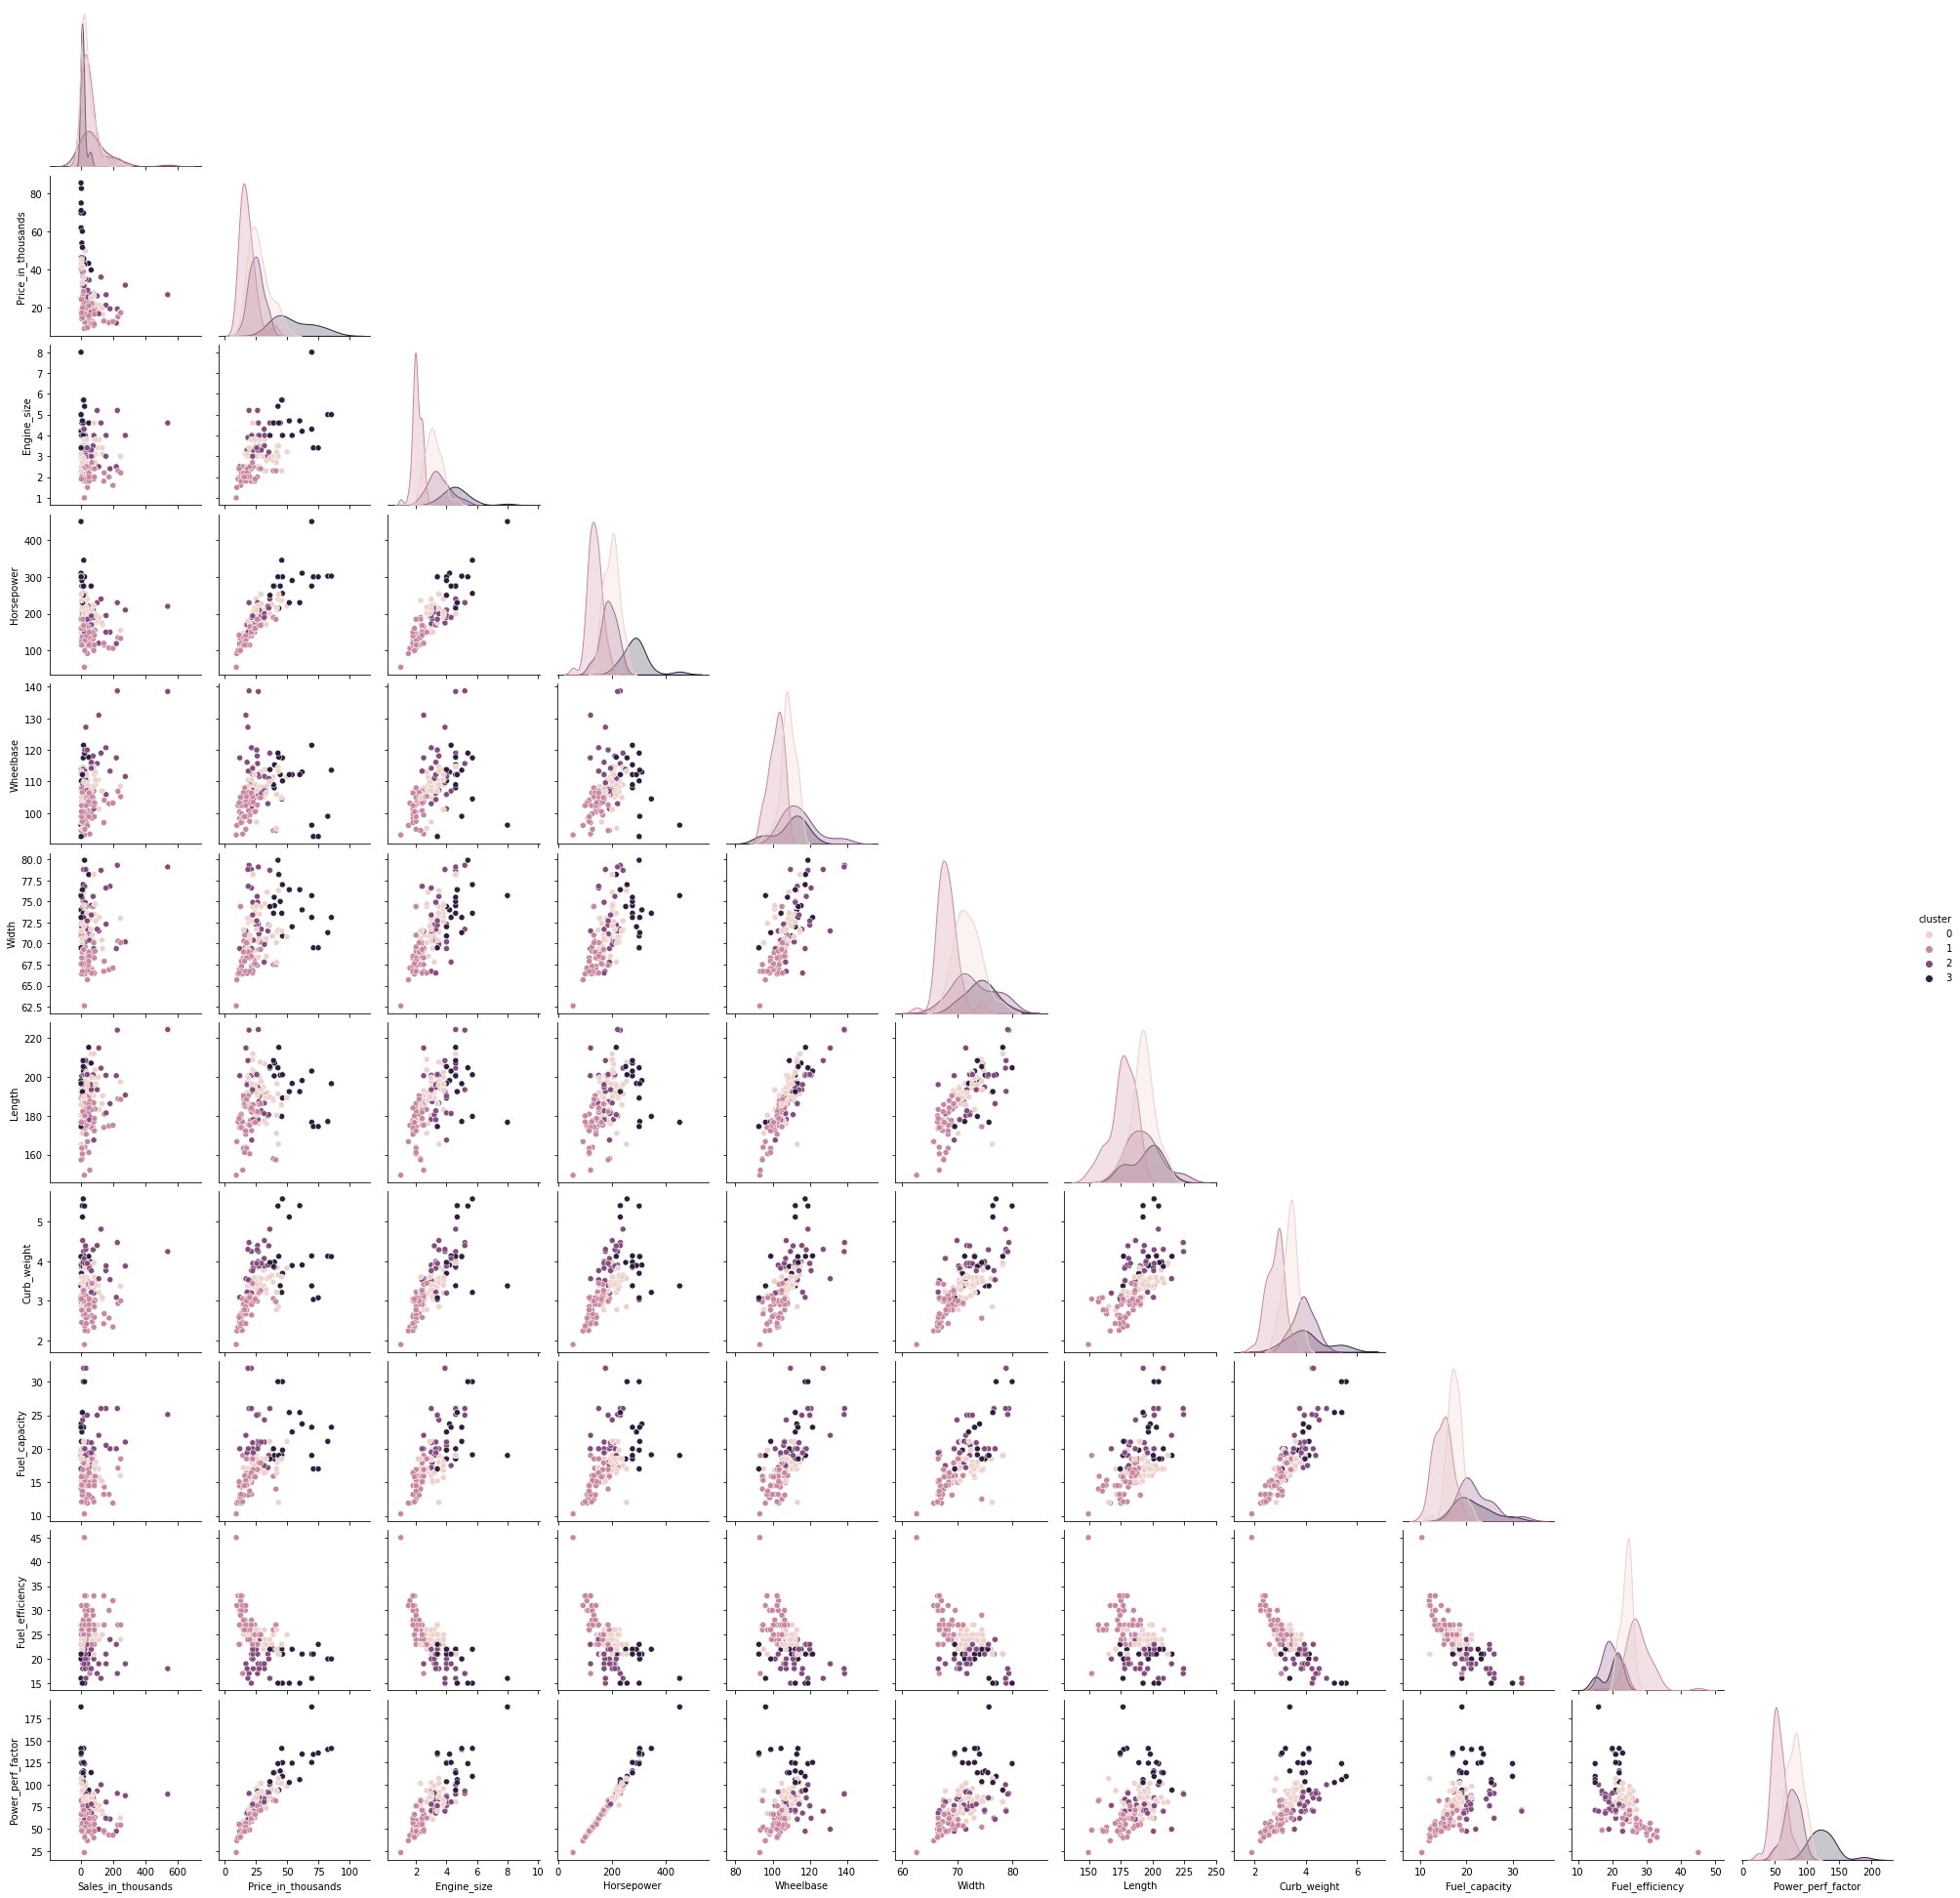

Cluster Number:  1
['Integra' 'A4' 'Cavalier' 'Prizm' 'Metro' 'Cirrus' 'Neon' 'Escort'
 'Focus' 'Civic' 'Accord' 'CR-V' 'Accent' 'Elantra' 'Wrangler' 'Mirage'
 'Eclipse' 'Galant' 'Mystique' 'Cougar' 'SLK' 'SLK230' 'Sentra' 'Altima'
 'Alero' 'Breeze' 'Sunfire' '3-Sep' 'SL' 'SC' 'SW' 'LW' 'LS' 'Outback'
 'Forester' 'Corolla' 'Camry' 'Celica' 'Tacoma' 'RAV4' '4Runner' 'Golf'
 'Jetta' 'Passat' 'Cabrio' 'GTI' 'Beetle' 'S40' 'V40' 'S70' 'V70']
Cluster Number:  0
['TL' 'CL' 'RL' 'A6' '323i' '328i' '528i' 'Century' 'Regal' 'Park Avenue'
 'LeSabre' 'Catera' 'Malibu' 'Lumina' 'Monte Carlo' 'Camaro' 'Impala'
 'Sebring Coupe' 'Sebring Conv.' 'Concorde' 'LHS' '300M' 'Avenger'
 'Stratus' 'Intrepid' 'Mustang' 'Contour' 'Taurus' 'Crown Victoria'
 'Sonata' 'I30' 'S-Type' 'ES300' 'GS300' 'Diamante' '3000GT' 'Sable'
 'Grand Marquis' 'C-Class' 'E-Class' 'CLK Coupe' 'Maxima' 'Cutlass'
 'Intrigue' 'Prowler' 'Grand Am' 'Firebird' 'Grand Prix' 'Bonneville'
 'Boxter' '5-Sep' 'Avalon' 'C70' 'S80']
Cluster Numbe

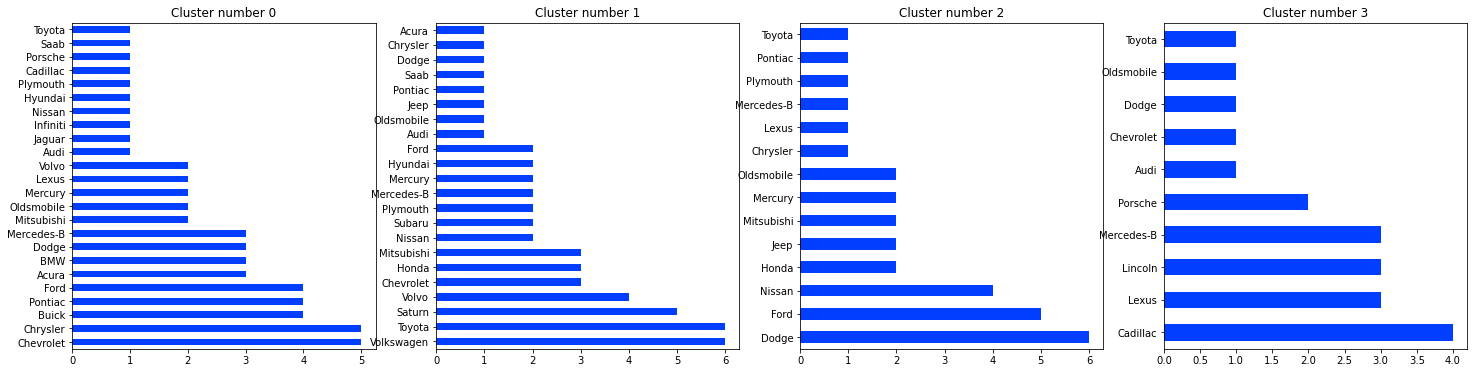

In [31]:
#pair plot for all features
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(dfb)

car_sales['cluster'] = cluster_labels

sns.set_palette("bright")
sns.pairplot(car_sales, kind="scatter", hue ="cluster", corner=True)
plt.show()

fig, axs = plt.subplots(ncols=len(car_sales['cluster'].unique()), figsize=(25, 6))

for cluster in car_sales['cluster'].unique():
    
    print('Cluster Number: ', str(cluster))
    temp_df = car_sales[['Manufacturer','Model','cluster']][car_sales['cluster'] == cluster]
    
    print(temp_df.Model.unique())
    temp_df.Manufacturer.value_counts().plot(kind= 'barh',ax=axs[cluster])
    axs[cluster].set_title('Cluster number {}'.format(cluster))
    
    print(10* '====')

In [ ]:
#here we can see how different features of cars are clustered in pair plot above .in the last chart we can car names in their respective clusters 